# Pandas Visualization

Before we dive into visualization in pandas, lets take a look at the matplotlib's style package. Matplotlib comes with a number of predefined styles, which we can choose from, to change the default look of our plots. Because pandas is using matplotlib under the hood, this will change the default style of our pandas graphs as well.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

We can use plt.style.available to see the predefined styles provided. 

In [2]:
# see the pre-defined styles provided.
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Let's use the seaborn-colorblind style, which will change the default colors of our plots to use a color palette that is more color vision deficiency friendly. 

In [3]:
# use the 'seaborn-colorblind' style
plt.style.use('seaborn-colorblind')

Now, where the built-in visualization of pandas really shines is in helping with fast and easy plotting of series and DataFrames that can help us explore the data.

### DataFrame.plot

Let's make a DataFrame. First, we'll set the seed for the random number generator, which will allow us to reproduce the data. Next, let's add three columns of random time series data. We can generate the random data by cumulatively summing up random numbers. Numpy has a great function for this called cumsum, which cumulatively sums an array. 

Let's do this for three columns, A, B and C. And also offset the B column by + 20 and the C column by- 20. Using date_range, we can set the index to be everyday in 2017. 

In [4]:
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


Now let's see what this data looks like a little more visually. To plot this data we can use the plot method on the DataFrame. The plot method on series and DataFrame is just a simple wrapper around plt.plot. So when we call df.plot, we get a line graph of all the columns in the data frame with labels.

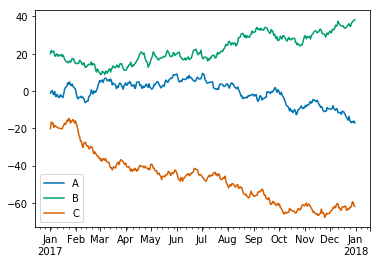

In [5]:
df.plot(); # add a semi-colon to the end of the plotting call to suppress unwanted output

Notice how the colors are slightly different from the default matplotlib colors because of the style we used. Also, notice this cool Jupyter Notebook trick. If you add a semicolon to the end of the plotting call, this will suppress unwanted output. And this works with regular matplotlib, too. 

DataFrame.plot allows us to plot a number of different kinds of plots. We can select which plot we want to use by pressing it into the kind parameter. Let's try and create a scatter plot that takes the A and B columns of df. We pass in scatter to the kind parameter to change the plot type. 

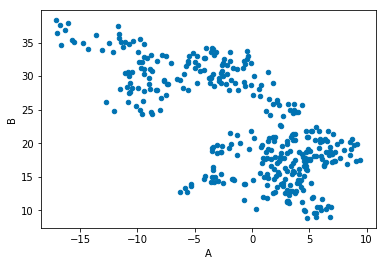

In [6]:
df.plot('A','B', kind = 'scatter');

This is what we'd get if we called plt.plot on the A and B columns with the point marker parameter. Passing scatter into the kind keyword argument changed the plot to a scatterplot. 

You can also choose the plot kind by using the `DataFrame.plot.kind` methods instead of providing the `kind` keyword argument.

`kind` :
- `'line'` : line plot (default)
- `'bar'` : vertical bar plot
- `'barh'` : horizontal bar plot
- `'hist'` : histogram
- `'box'` : boxplot
- `'kde'` : Kernel Density Estimation plot
- `'density'` : same as 'kde'
- `'area'` : area plot
- `'pie'` : pie plot
- `'scatter'` : scatter plot
- `'hexbin'` : hexbin plot

Now let's try this and create something a little more complex. This time we want to make a scatterplot with points varying in color and size. We'll use df.plot.scatter, pass in columns A and C, and set the color C and size S to change based on the value of column B. Finally, we can choose the color palette used by passing a string into the parameter color map. Here, I'll use viridis, which is particularly pleasing to the eye.

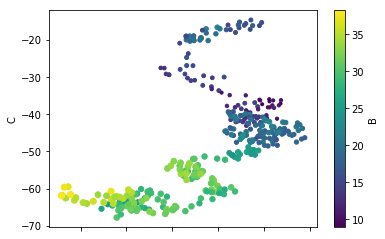

In [7]:
# create a scatter plot of columns 'A' and 'C', with changing color (c) and size (s) based on column 'B'
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')

Here we can see the A and C columns plotted against one another with the size and color changing based on the values of the B column. Because `df.plot.scatter` returns a `matplotlib.axes._subplot`, we can perform modification on this object just like objects returned by matplotlib plots.

For example, let's see what it looks like when we change the aspect ratio of the AxesSubplot to equal.

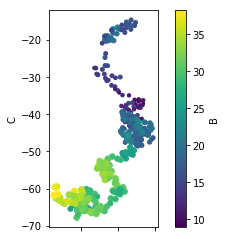

In [8]:
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap='viridis')
ax.set_aspect('equal')

Setting the aspect ratio to equal allows the viewer to easily see that the range of series A is much smaller than series C. Using pandas, we can also easily do box plots, histograms, and kernel density estimate plots. Which are useful for visualizing an estimate of a variable's probability density function. Kernel density estimation plots come in handy in data science applications where you want to derive a smooth continuous function from a given sample.

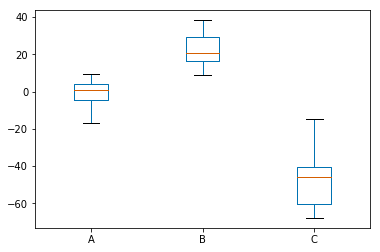

In [9]:
df.plot.box();

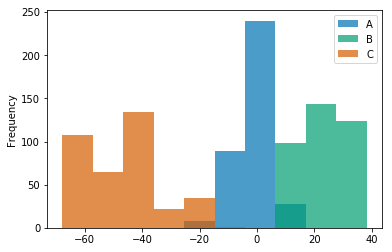

In [10]:
df.plot.hist(alpha=0.7);

[Kernel density estimation plots](https://en.wikipedia.org/wiki/Kernel_density_estimation) are useful for deriving a smooth continuous function from a given sample.

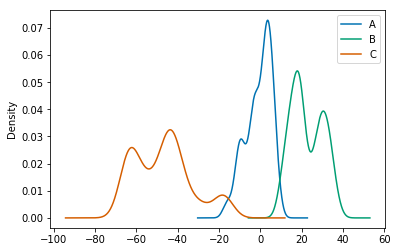

In [11]:
df.plot.kde();

### pandas.tools.plotting

Pandas also has plotting tools that help with visualizing large amounts of data or high dimensional data. Let's explore a couple of these tools by loading in the iris flower data set. The iris data set is a classic multivariate data set, which includes the sepal length, sepal width, petal length, and petal width for hundreds of samples of three species of the iris flower. 

[Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [12]:
iris = pd.read_csv('data\iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


pandas has a plotting tool that allows us to create a scatter matrix from a DataFrame. A scatter matrix is a way of comparing each column in a DataFrame to every other column in a pairwise fashion. Let's use it to visualize the iris dataframe and see what insights we can gain from our data. 

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


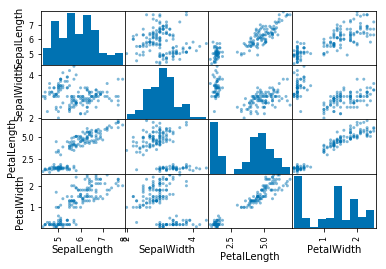

In [13]:
pd.tools.plotting.scatter_matrix(iris);

The scatter matrix creates scatter plots between the different variables and histograms along the diagonals. This allows us to quickly see some of the more obvious patterns in the data set. Looking at the scatter plots, it appears that there are some distinct groupings of the points, which might indicate that there could be some clustering going on. And while this looks impressive and is certainly useful, realize that in the last two weeks you have gained all of the skills to manually build these kinds of plots if you want to. This is nothing more than a four by four grid of subplots, with some plots histograms and the others scatterplots. Let's look at one more plotting tool in pandas which will help us visualize multivariate data. 

pandas includes a plotting tool for creating parallel coordinates plots. Parallel coordinate plots are a common way of visualizing high dimensional multivariate data. Each variable in the data set corresponds to an equally spaced parallel vertical line. The values of each variable are then connected by lines between for each individual observation. Coloring the lines by class, in this example the species of flower, allows the viewer to more easily see any patterns or clustering. For instance, looking at our iris data set, we can see that the petal length and petal width are two variables that split the different species fairly clearly. With iris virginica having the longest and widest petals. And iris setosa having the shortest and narrowest petals. Well that's it for visualization in pandas.

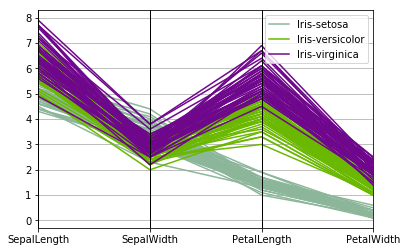

In [14]:
plt.figure()
pd.plotting.parallel_coordinates(iris, 'Name');

# Seaborn

Seaborn is really just a wraparound matplotlib. It adds styles to make default data visualizations much more visually appealing and makes creation of specific types of complicated plots much simpler. To get us started, we'll imported seaborn as `sns`.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

Now, let's set the seed for the random number generator, which lets us reproduce the data. Next, we'll make a panda series, `v1`, that's 1000 numbers drawn from a normal distribution with a mean of 0, and a standard deviation of 10. Let's also make a second pandas series, `v2`, which is 2 times `v1`, plus 1,000 numbers drawn from a normal distribution with a mean of 60 and standard deviation of 15.

In [16]:
np.random.seed(1234)

v1 = pd.Series(np.random.normal(0,10,1000), name='v1')
v2 = pd.Series(2*v1 + np.random.normal(60,15,1000), name='v2')

Now let's see what the histograms of these two variables look like when we plot them side by side. We can set alpha equal to 0.7 so the histograms don't cover one another up. For the bin parameter, instead of integer denoting the number of bins we want we can also pass in a specific sequence using np.arange to specify the specific bins we want to use. This is useful for the one when we want to plot two histograms in the same figure to make sure the bin sizes are equivalent for both histograms. We also add labels so we can see which histogram belongs to which variable using a legend. 

<IPython.core.display.Javascript object>


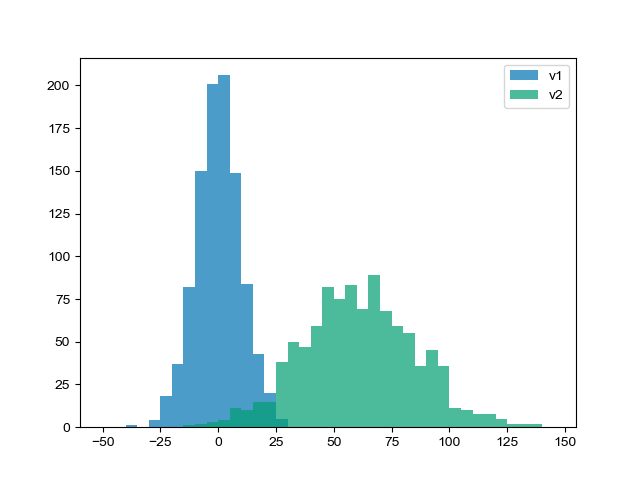

In [17]:
plt.figure()
plt.hist(v1, alpha=0.7, bins=np.arange(-50,150,5), label='v1');
plt.hist(v2, alpha=0.7, bins=np.arange(-50,150,5), label='v2');
plt.legend();

Looking at the histograms we can quickly see that `v1` has a lower mean than `v2`, and that `v2` has a larger spread than `v1`. Even though up to this point we've only used matplotlib for plotting we see that even importing Seaborn has changed the aesthetics of the plot to a different style from the matplotlib default.

Let's visualize these histograms again but in a different way. First, let's pass in both of the series `v1` and `v2` in a list, and set the histtype to barstacked. Setting density to True will normalize the histogram to form a probability density. Then, we'll create a variable `v3`, which is the combination of `v1` and `v2`. We'll use `v3` to plot a kernel density estimate plot over the stacked histogram. The kernel density estimation plot estimates the probability density function of the variable `v3`. Plotting it on top of the stacked histograms of `v1` and `v2` allows us to see the relationship between these two visualizations.

<IPython.core.display.Javascript object>


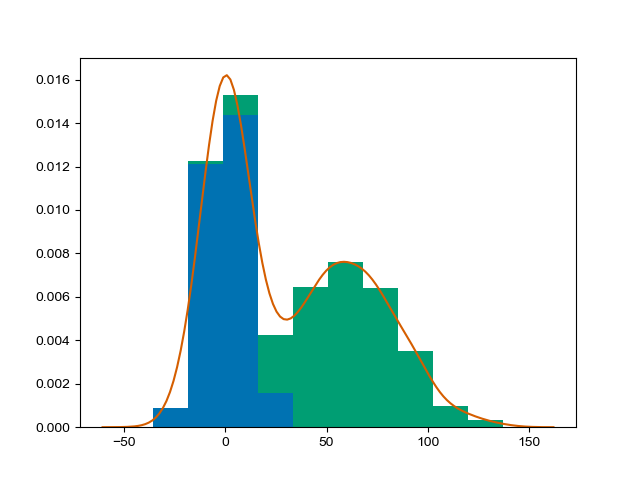

In [18]:
# plot a kernel density estimation over a stacked barchart
plt.figure()
plt.hist([v1, v2], histtype='barstacked', density=True);
v3 = np.concatenate((v1,v2))
sns.kdeplot(v3);

Seaborn provides a convenient function for these type of plots `sns.distplot`. Let's take a look at how it works. We can pass in the variable we want to visualize along with keyword arguments for each of the individual components of the plot. Let's set the histogram color to teal and the KDE color to navy. 

<IPython.core.display.Javascript object>


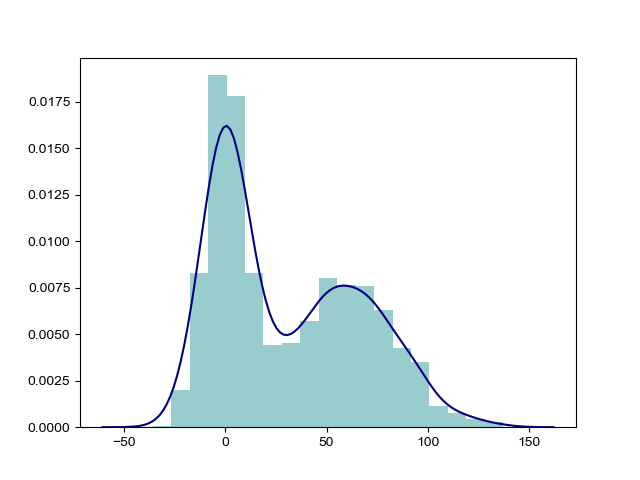

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [19]:
plt.figure()
# we can pass keyword arguments for each individual component of the plot
sns.distplot(v3, hist_kws={'color': 'Teal'}, kde_kws={'color': 'Navy'});

Now let's look at an example of one of the types of complex plots that Seborn provides a convenient interface for, the joint plot. The jointplot creates a scatterplot along the histograms for each individual variable on each axis. To create a jointplot, we just type sns.jointplot and pass in the two series, `v1` and `v2`. Setting alpha to 0.4 will help with visualizing overlapping points. The jointplot allows us to visualize the distribution of the two variables individually. As well as relationships between the variables.

<IPython.core.display.Javascript object>


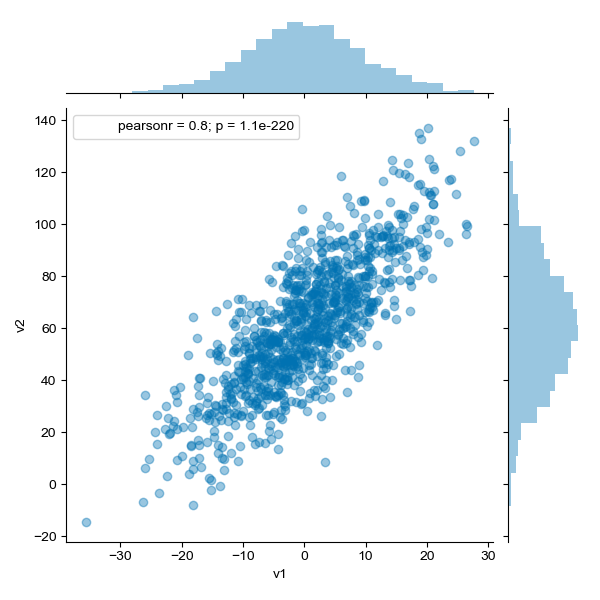

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [20]:
sns.jointplot(v1, v2, alpha=0.4);

Using jointplot we can see that `v1` and `v2` appear to be normally distributed variables that are positively correlated. 

Because Seaborn uses matplotlib we can tweak the plots using Matplotlib's tools. Some of the plotting functions in Seaborn return a matplotlib axis object. While others operate on an entire figure and produce plots with several panels, returning a Seaborn grid object. In both cases, matplotlib can be used to further tweak the plots. 

For example, sns.jointplot returns a Seaborn grid object. From this we can plot a map plot axis subplot object using grid.x joint. Then, we can set the aspect ratio to be equal, using set_aspect equal.

<IPython.core.display.Javascript object>


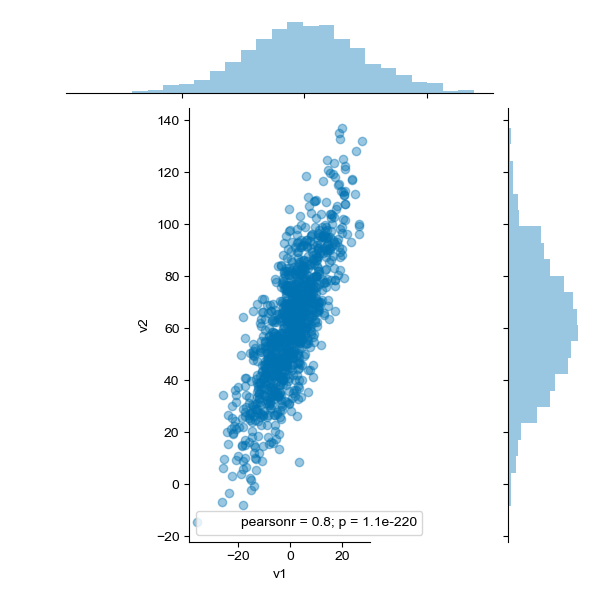

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [21]:
grid = sns.jointplot(v1, v2, alpha=0.4);
grid.ax_joint.set_aspect('equal')

Hexbin plots are the bivariate counterpart to histograms. Hexbin plots show the number of observations that fall within hexagonal bins. Sns joint plot includes the hex bin style we can use by passing in hex to the kind parameter. 

<IPython.core.display.Javascript object>


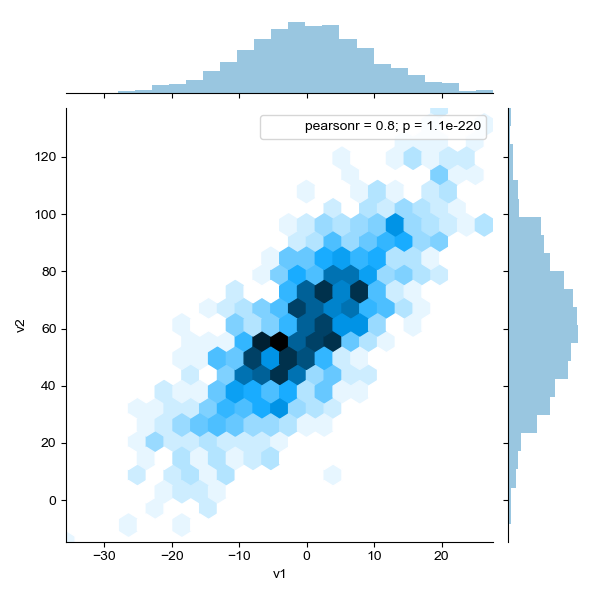

c:\users\jtownson\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [22]:
sns.jointplot(v1, v2, kind='hex');

The hexbin style of plot works well with relatively large data sets.

Another good option for visualizing the distribution of data sets is kernel density estimations or KDE plots. You can think of two dimensional KDE plots as the continuous version of the hexbin jointplot. 

First, let's tell Seaborn to use a different style using sns.set_style('white'). All of the following charts will have the gray grid turned off. Then we'll create a joint plot just like before, except this time, let's set the kind to kde. Finally, let's space to 0, which will plot the marginal distributions directly on the border of the scatter plot. 

<IPython.core.display.Javascript object>


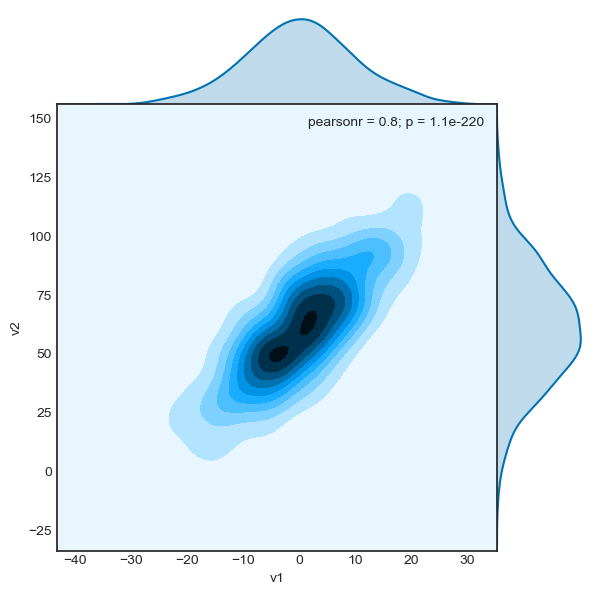

In [23]:
# set the seaborn style for all the following plots
sns.set_style('white')

sns.jointplot(v1, v2, kind='kde', space=0);

We can see that Seaborn has some built-in options for easy customization. And provides us with easy to create and beautiful plots for exploring the distributions of your data. For the last part of this tutorial, let's load in the iris dataset, to see how Seaborn handles visualizations of categorical data. 

In [24]:
iris = pd.read_csv('data\iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Similar to pandas, Seaborn has a built in function that creates a scatterplot matrix. We pass in the iris data of frame, tell it to map name to different colors using the hue parameter, and tell it to use a kde along the diagonals instead of the default histograms. Using pair plot to look at your data frame can be a very useful tool in exploratory data analysis. 

<IPython.core.display.Javascript object>


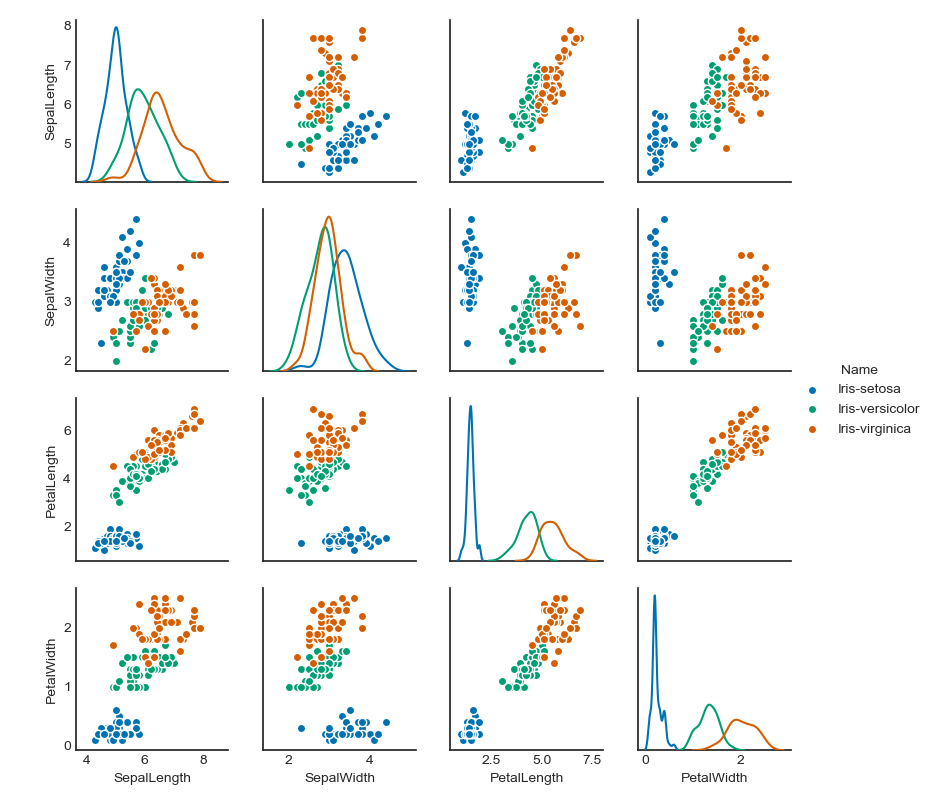

In [25]:
sns.pairplot(iris, hue='Name', diag_kind='kde', size=2);

Looking at the pair plot, it's clear there are some clusters in the data set. It looks like petal length and petal width are good options for separating the observations, whereas width is not a strong separator.

One final plot we will look at is called the violin plot. You can think of a violin plot as a more informative version of a box plot. To demonstrate, let's plot a violin plot next to a swarm plot, which you can think of as a scatter plot for categorical data. 

First let's create a new figure and a subplot. Then, we'll create the swarmplot, passing in Name and PetalLength, and the data, which is the iris data frame. For the next subplot, we'll create the violin plot, again passing in Name, PetalLength and the iris data frame. 

<IPython.core.display.Javascript object>


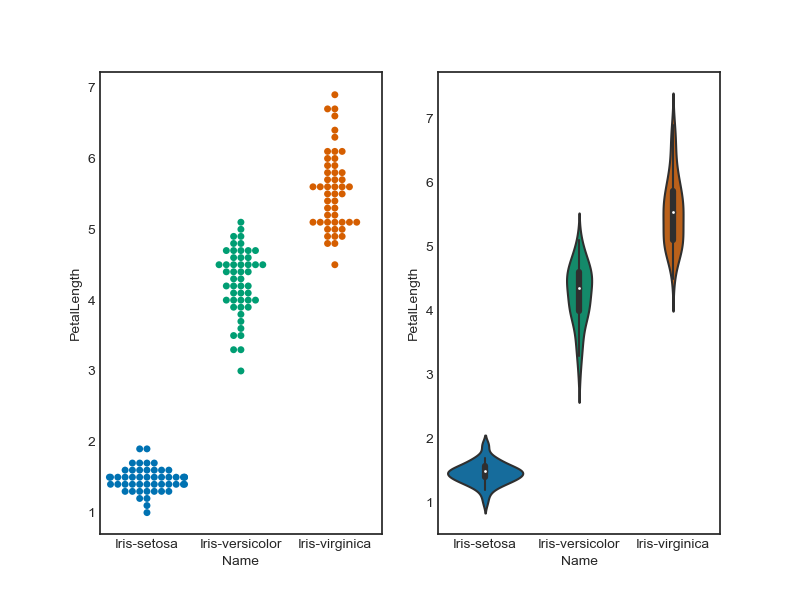

In [26]:
plt.figure(figsize=(8,6))
plt.subplot(121)
sns.swarmplot('Name', 'PetalLength', data=iris);
plt.subplot(122)
sns.violinplot('Name', 'PetalLength', data=iris);

Looking at the swarmplot, each species has its own column and each observation's petal length is shown. With more common values appearing as the wide parts of the cluster, much like a histogram. The violinplot is like box plot with a rotated kernel density estimation on each side.

Violin plots convey more information than box plots and are able to show particular phenomena within the distribution that box plots are unable to convey such as multi modality. Seaborn is a library that not only adds new styles and visual aspects. But also introduces new functionality such as joint plots, scatter matrix plots, and violin plots.